## 主要功能的帮助文档：
[matplotlib](http://matplotlib.org/1.4.3/contents.html)
[seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
[pandas](http://pandas.pydata.org/pandas-docs/version/0.16.0/)
[scikit-learn](http://scikit-learn.org/stable/)

## 读取数据
pandas可以读取文本文件、json、数据库、Excel等文件
使用read_csv方法读取以逗号分隔的文本文件作为DataFrame
head、tail等方法可以浏览部分数据集，可使用dtypes方法查看各列数据类型，通过astype方法修改数据类型

In [78]:
import numpy as np
import pandas as pd
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
table_target = pd.read_csv("../data/data/trainingset/orderFuture_train.csv",sep=",",encoding="UTF-8") #读取目标属性表
user_info = pd.read_csv("../data/data/trainingset/userProfile_train.csv",sep=",",encoding="UTF-8") #读取用户基本属性表
order_info = pd.read_csv("../data/data/trainingset/orderHistory_train.csv",sep=",",encoding="UTF-8") #读取历史订单数据表
action_info = pd.read_csv("../data/data/trainingset/action_train.csv",sep=",",encoding="UTF-8") #读取用户行为数据表
# 没有使用action_info
user_com = pd.read_csv("../data/data/trainingset/userComment_train.csv",sep=',',encoding="UTF-8")

In [3]:
table_target.head(5)#读取数描述数据集前5行，可以用table_target.tail(5)读取最尾部5行

,userid,orderType
0,100000000013,0
1,100000000111,0
2,100000000127,0
3,100000000231,0
4,100000000379,0


In [4]:
table_target.tail(5)

,userid,orderType
40302,114999280232,1
40303,114999480334,0
40304,114999482932,0
40305,114999582132,0
40306,114999782736,0


In [5]:
user_info.head(5) 

,userid,gender,province,age
0,100000000013,男,NaN,60后
1,100000000111,NaN,上海,NaN
2,100000000127,NaN,上海,NaN
3,100000000231,男,北京,70后
4,100000000379,男,北京,NaN


In [6]:
order_info.head(5)

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,1481714516,0,柏林,德国,欧洲
1,100000000013,1000014,1501959643,0,旧金山,美国,北美洲
2,100000000393,1000033,1499440296,0,巴黎,法国,欧洲
3,100000000459,1000036,1480601668,0,纽约,美国,北美洲
4,100000000459,1000034,1479146723,0,巴厘岛,印度尼西亚,亚洲


In [7]:
action_info.head(5)

,userid,actionType,actionTime
0,100000000013,1,1474300753
1,100000000013,5,1474300763
2,100000000013,6,1474300874
3,100000000013,5,1474300911
4,100000000013,6,1474300936


In [8]:
user_com.head()

,userid,orderid,rating,tags,commentsKeyWords
0,100000000013,1000015,4.0,NaN,"['很','简陋','太','随便']"
1,100000000231,1000024,5.0,提前联系|耐心等候,"['很','细心']"
2,100000000471,1000038,5.0,NaN,NaN
3,100000000637,1000040,5.0,主动热情|提前联系|举牌迎接|主动搬运行李,NaN
4,100000000755,1000045,1.0,未举牌服务,NaN


In [10]:
user_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 5 columns):
userid              9863 non-null int64
orderid             9863 non-null int64
rating              9863 non-null float64
tags                6754 non-null object
commentsKeyWords    4092 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 385.4+ KB


In [11]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40307 entries, 0 to 40306
Data columns (total 4 columns):
userid      40307 non-null int64
gender      15760 non-null object
province    36412 non-null object
age         4742 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
order_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20653 entries, 0 to 20652
Data columns (total 7 columns):
userid       20653 non-null int64
orderid      20653 non-null int64
orderTime    20653 non-null int64
orderType    20653 non-null int64
city         20653 non-null object
country      20653 non-null object
continent    20653 non-null object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


## 描述数据集
对数据的基本统计量进行计算以便初步了解数据，可以对统计量一个个单独计算，比如pandas提供了一个describe函数可以一次计算多个统计量，默认计算连续型数据的统计量，要计算离散数据的统计量需要预先修改相应字段的类型，然后传入向describe函数中传入include参数

其中1表示购买了精品旅游服务，0表示未购买精品旅游服务（包括普通旅游服务和未下订单）

In [12]:
table_target.describe()

,userid,orderType
count,4.030700e+04,40307.000000
mean,1.119145e+11,0.164364
std,1.869774e+09,0.370610
min,1.000000e+11,0.000000
25%,1.109180e+11,0.000000
50%,1.114490e+11,0.000000
75%,1.126073e+11,0.000000
max,1.149998e+11,1.000000


In [13]:
# 样本标签
table_target["orderType"].value_counts()

0    33682
1     6625
Name: orderType, dtype: int64

In [14]:
# 查看数据集有效笔数
print(len(table_target.userid.unique()),
      len(user_info.userid.unique()),
      len(order_info.userid.unique()),
      len(action_info.userid.unique()),
     len(user_com.userid.unique()))

40307 40307 10637 40307 9863


In [17]:
#查看数据集字段类型
user_info.dtypes
order_info.dtypes
action_info.dtypes
user_com.dtypes

userid       int64
gender      object
province    object
age         object
dtype: object

userid        int64
orderid       int64
orderTime     int64
orderType     int64
city         object
country      object
continent    object
dtype: object

userid        int64
actionType    int64
actionTime    int64
dtype: object

userid                int64
orderid               int64
rating              float64
tags                 object
commentsKeyWords     object
dtype: object

In [46]:
order_info.head()
# 将时间戳格式化

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,2016-12-14 11:21:56,0,柏林,德国,欧洲
1,100000000013,1000014,2017-08-05 19:00:43,0,旧金山,美国,北美洲
2,100000000393,1000033,2017-07-07 15:11:36,0,巴黎,法国,欧洲
3,100000000459,1000036,2016-12-01 14:14:28,0,纽约,美国,北美洲
4,100000000459,1000034,2016-11-14 18:05:23,0,巴厘岛,印度尼西亚,亚洲


In [45]:
order_info["orderTime"] = pd.to_datetime(order_info["orderTime"],unit="s")
action_info["actionTime"] = pd.to_datetime(action_info["actionTime"],unit="s")

In [35]:
pd.to_datetime(order_info["orderTime"],unit="s")
#.tz_localize('UTC').tz_convert("Asia/Shanghai")

0       2016-12-14 11:21:56
1       2017-08-05 19:00:43
2       2017-07-07 15:11:36
3       2016-12-01 14:14:28
4       2016-11-14 18:05:23
5       2017-02-10 15:14:52
6       2017-06-29 15:55:34
7       2017-07-23 23:29:51
8       2017-07-15 00:40:41
9       2017-07-19 19:43:38
10      2017-06-12 10:14:58
11      2017-03-22 10:51:28
12      2017-01-03 20:19:01
13      2017-01-03 20:19:01
14      2017-02-07 17:45:11
15      2017-01-03 20:19:01
16      2017-01-03 20:19:01
17      2017-01-04 11:18:54
18      2017-05-27 19:45:36
19      2017-05-13 12:04:23
20      2017-05-13 19:26:25
21      2017-05-18 13:36:06
22      2017-05-13 18:30:55
23      2017-05-13 20:23:12
24      2017-06-13 09:43:32
25      2017-06-13 09:31:55
26      2017-06-13 09:55:40
27      2017-03-06 16:56:40
28      2017-03-07 11:08:29
29      2017-03-07 10:52:14
                ...        
20623   2017-07-18 12:14:54
20624   2017-08-17 21:45:31
20625   2017-08-25 07:32:58
20626   2017-08-01 06:58:05
20627   2017-07-27 1

In [44]:
 pd.to_datetime(action_info["actionTime"],unit="s")

0         2016-09-19 15:59:13
1         2016-09-19 15:59:23
2         2016-09-19 16:01:14
3         2016-09-19 16:01:51
4         2016-09-19 16:02:16
5         2016-09-19 16:02:21
6         2016-09-19 16:02:52
7         2016-09-19 16:03:10
8         2016-09-19 16:22:56
9         2016-09-19 16:23:14
10        2016-09-21 17:45:34
11        2016-09-22 17:56:08
12        2016-09-22 17:56:32
13        2016-09-23 19:04:33
14        2016-09-28 11:28:52
15        2016-09-29 19:53:25
16        2016-09-29 19:53:38
17        2016-12-14 11:19:09
18        2016-12-14 11:21:25
19        2016-12-14 11:21:59
20        2016-12-14 11:59:36
21        2016-12-15 03:29:31
22        2016-12-15 14:28:52
23        2016-12-15 14:37:40
24        2016-12-15 14:37:48
25        2016-12-15 14:37:50
26        2016-12-15 14:38:29
27        2016-12-15 14:38:33
28        2016-12-15 21:52:57
29        2016-12-15 22:41:23
                  ...        
1334826   2017-08-22 22:57:18
1334827   2017-08-22 22:59:24
1334828   

In [37]:
action_info["actionTime"]

0          1474300753
1          1474300763
2          1474300874
3          1474300911
4          1474300936
5          1474300941
6          1474300972
7          1474300990
8          1474302176
9          1474302194
10         1474479934
11         1474566968
12         1474566992
13         1474657473
14         1475062132
15         1475178805
16         1475178818
17         1481714349
18         1481714485
19         1481714519
20         1481716776
21         1481772571
22         1481812132
23         1481812660
24         1481812668
25         1481812670
26         1481812709
27         1481812713
28         1481838777
29         1481841683
              ...    
1334826    1503442638
1334827    1503442764
1334828    1503442820
1334829    1503443091
1334830    1503443256
1334831    1503443380
1334832    1503443412
1334833    1503443432
1334834    1503443501
1334835    1503443565
1334836    1503766147
1334837    1503766171
1334838    1503766197
1334839    1504044941
1334840   

In [27]:
?pd.to_datetime

In [21]:
#查看数据集的基本统计量,include='all'参数可使结果输出所有支持的统计量，默认为none
order_info.describe(include="all")
action_info.describe(include="all")

,userid,orderid,orderTime,orderType,city,country,continent
count,2.065300e+04,2.065300e+04,20653,20653.00000,20653,20653,20653
unique,NaN,NaN,20296,NaN,205,51,6
top,NaN,NaN,2017-03-19 22:21:22,NaN,新加坡,日本,亚洲
freq,NaN,NaN,6,NaN,1937,3509,12054
first,NaN,NaN,2016-11-05 16:37:53,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-09-11 13:35:53,NaN,NaN,NaN,NaN
mean,1.118860e+11,1.052265e+06,NaN,0.15344,NaN,NaN,NaN
std,1.932821e+09,3.048027e+04,NaN,0.36042,NaN,NaN,NaN
min,1.000000e+11,1.000014e+06,NaN,0.00000,NaN,NaN,NaN
25%,1.109177e+11,1.027736e+06,NaN,0.00000,NaN,NaN,NaN


,userid,actionType,actionTime
count,1.334856e+06,1.334856e+06,1334856
unique,NaN,NaN,1263010
top,NaN,NaN,2017-03-28 10:00:04
freq,NaN,NaN,137
first,NaN,NaN,2016-08-13 20:10:58
last,NaN,NaN,2017-09-10 23:57:45
mean,1.118264e+11,3.927026e+00,NaN
std,2.129090e+09,2.168196e+00,NaN
min,1.000000e+11,1.000000e+00,NaN
25%,1.109112e+11,1.000000e+00,NaN


In [23]:
#查看数据表是否有缺失值
user_info.isnull().sum()
order_info.isnull().sum()
action_info.isnull().sum()
user_com.isnull().sum()

userid          0
gender      24547
province     3895
age         35565
dtype: int64

userid       0
orderid      0
orderTime    0
orderType    0
city         0
country      0
continent    0
dtype: int64

userid        0
actionType    0
actionTime    0
dtype: int64

userid                 0
orderid                0
rating                 0
tags                3109
commentsKeyWords    5771
dtype: int64

## 一、数据探索
### 1. 用户基本属性表
#### 1.1 数据转换
原始数据需要经过转换才能符合建模需求，例如：生成新字段、重新分类、变换哑变量、去除重复数据、过滤极端\异常值、填补缺失值、变量聚类、离散化等

In [47]:
user_info = user_info.fillna("未知") #空值填补

#### 1.2 数据探索
除了describe计算基本统计量外，还需要探索目标变量和自变量以及自变量之间的关系，以决定哪些变量入选模型，这种数据探索往往结合图形来说明。 

常用的绘图包包括matplotlib、seaborn等

In [48]:
user_info["gender"].value_counts()
user_info["province"].value_counts().head(10)
user_info["age"].value_counts()

未知    24547
女      8620
男      7140
Name: gender, dtype: int64

上海    9760
北京    8301
广东    4784
未知    3895
江苏    2813
浙江    2447
四川    1310
湖北     741
辽宁     725
天津     722
Name: province, dtype: int64

未知     35565
80后     1667
70后     1308
60后     1061
90后      621
00后       85
Name: age, dtype: int64

In [49]:
# 导入Matplotlib库
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
# 设置绘图风格
plt.style.use("seaborn")

In [51]:
user_info.iloc[:,1].value_counts().index

Index(['未知', '女', '男'], dtype='object')

In [52]:
user_info.iloc[:,1].value_counts()

未知    24547
女      8620
男      7140
Name: gender, dtype: int64

<BarContainer object of 3 artists>

Text(0.5,0,'gender')

<BarContainer object of 6 artists>

Text(0.5,0,'age')

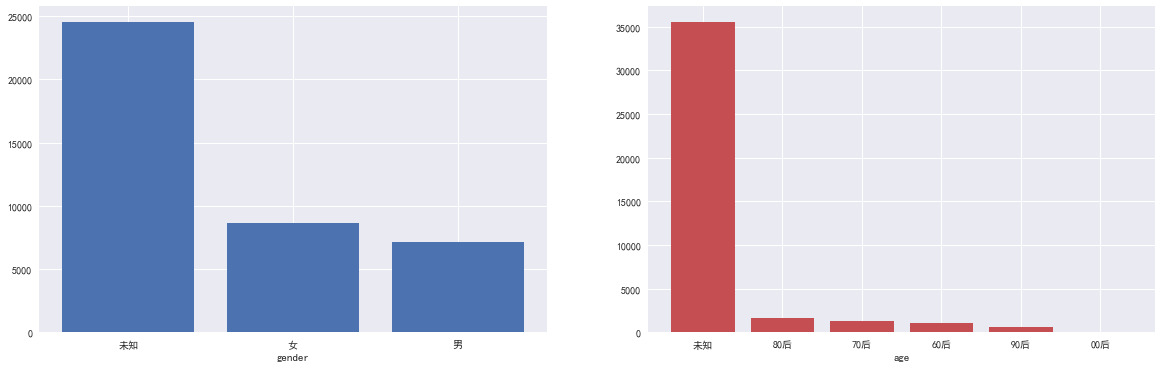

In [53]:
plt.rcParams['font.sans-serif']=['Simhei'] # 设置支持中文的字体显示
fig,ax = plt.subplots(1,2) # 行、列、子图编号
fig.set_size_inches(20,6)
p = sns.color_palette()
ax[0].bar(user_info.iloc[:,1].value_counts().index,user_info.iloc[:,1].value_counts(),color = p[0])
ax[0].set_xlabel(user_info.iloc[:,1].value_counts().name)

ax[1].bar(user_info.iloc[:,3].value_counts().index,user_info.iloc[:,3].value_counts(),color = p[2])
ax[1].set_xlabel(user_info.iloc[:,3].value_counts().name)

<BarContainer object of 32 artists>

Text(0.5,0,'province')

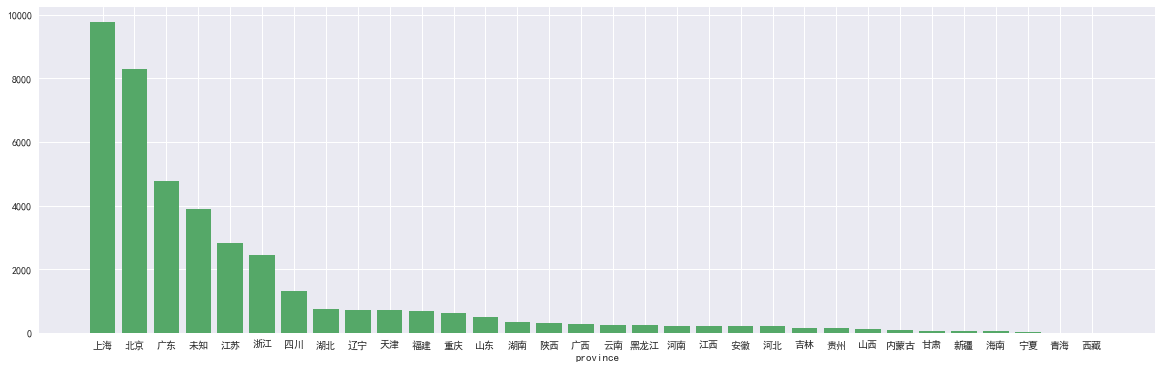

In [54]:
plt.rcParams['font.sans-serif']=['Simhei']
fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,6)
p = sns.color_palette()
ax.bar(user_info.iloc[:,2].value_counts().index,user_info.iloc[:,2].value_counts(),color = p[1])
ax.set_xlabel(user_info.iloc[:,2].value_counts().name)

In [55]:
user_orderType = user_info.merge(table_target,on="userid",how="left")
# 合并
user_orderType.head()

,userid,gender,province,age,orderType
0,100000000013,男,未知,60后,0
1,100000000111,未知,上海,未知,0
2,100000000127,未知,上海,未知,0
3,100000000231,男,北京,70后,0
4,100000000379,男,北京,未知,0


In [56]:
user_orderType.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40307 entries, 0 to 40306
Data columns (total 5 columns):
userid       40307 non-null int64
gender       40307 non-null object
province     40307 non-null object
age          40307 non-null object
orderType    40307 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [57]:
user_orderType["orderType"].value_counts()
# 订单类型有1或者0，两种不同值，分别代表了选择了精品旅游服务与没有选择精品旅游服务

0    33682
1     6625
Name: orderType, dtype: int64

In [23]:
user_orderType.groupby("gender",as_index=False)["orderType"]

In [26]:
user_orderType.groupby("gender",as_index=False)

In [60]:
user_orderType.groupby("gender",as_index=False)["orderType"].agg({"总数":'count',"精品订单数":np.sum})

,gender,总数,精品订单数
0,女,8620,1674
1,未知,24547,3730
2,男,7140,1221


In [61]:
gender_orderType = user_orderType.groupby("gender",as_index=False)["orderType"].agg({"总数":np.size,"精品订单数":np.sum})
gender_orderType["精品订单率"] = gender_orderType["精品订单数"]/gender_orderType["总数"]
gender_orderType.head()

,gender,总数,精品订单数,精品订单率
0,女,8620,1674,0.194200
1,未知,24547,3730,0.151953
2,男,7140,1221,0.171008


In [62]:
province_orderType = user_orderType.groupby("province",as_index=False)["orderType"].agg({"总数":np.size,"精品订单数":np.sum})
province_orderType["精品订单率"] = province_orderType["精品订单数"]/province_orderType["总数"]
province_orderType.sort_values(by="精品订单数",ascending=False)

,province,总数,精品订单数,精品订单率
0,上海,9760,1781,0.182480
3,北京,8301,1589,0.191423
11,广东,4784,765,0.159908
14,未知,3895,580,0.148909
15,江苏,2813,417,0.148240
19,浙江,2447,337,0.137720
5,四川,1310,162,0.123664
6,天津,722,124,0.171745
27,辽宁,725,105,0.144828
24,福建,693,104,0.150072


In [63]:
age_orderType = user_orderType.groupby("age",as_index=False)["orderType"].agg({"总数":np.size,"精品订单数":np.sum})
age_orderType["精品订单率"] = age_orderType["精品订单数"]/age_orderType["总数"]
age_orderType.sort_values(by="精品订单率",ascending=False)

,age,总数,精品订单数,精品订单率
3,80后,1667,320,0.191962
2,70后,1308,248,0.189602
1,60后,1061,193,0.181904
0,00后,85,14,0.164706
5,未知,35565,5754,0.161788
4,90后,621,96,0.154589


<BarContainer object of 3 artists>

Text(0.5,0,'性别精品订单情况')

<BarContainer object of 6 artists>

Text(0.5,0,'年龄精品订单情况')

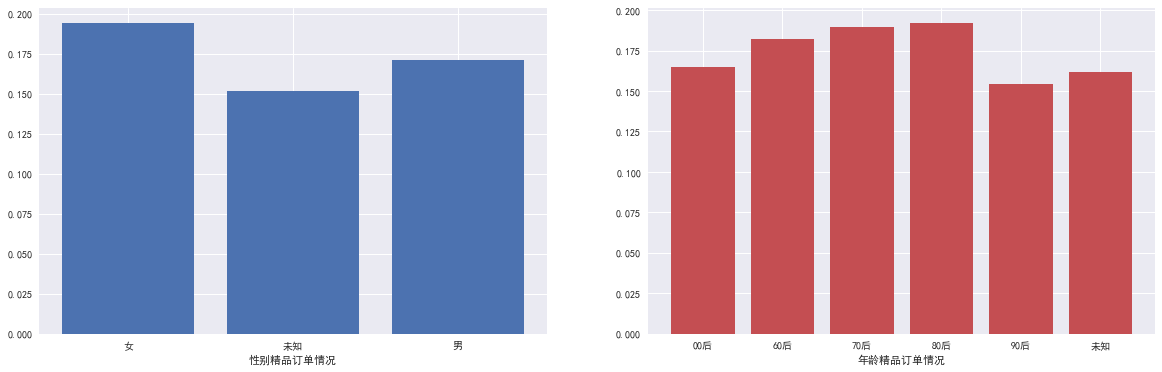

In [27]:
plt.rcParams['font.sans-serif']=['Simhei']
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,6)
p = sns.color_palette()

ax[0].bar(gender_orderType.iloc[:,0],gender_orderType.iloc[:,3],color=p[0])
ax[0].set_xlabel("性别精品订单情况")

ax[1].bar(age_orderType.iloc[:,0],age_orderType.iloc[:,3],color=p[2])
ax[1].set_xlabel("年龄精品订单情况")

<BarContainer object of 32 artists>

Text(0.5,0,'省份精品订单情况')

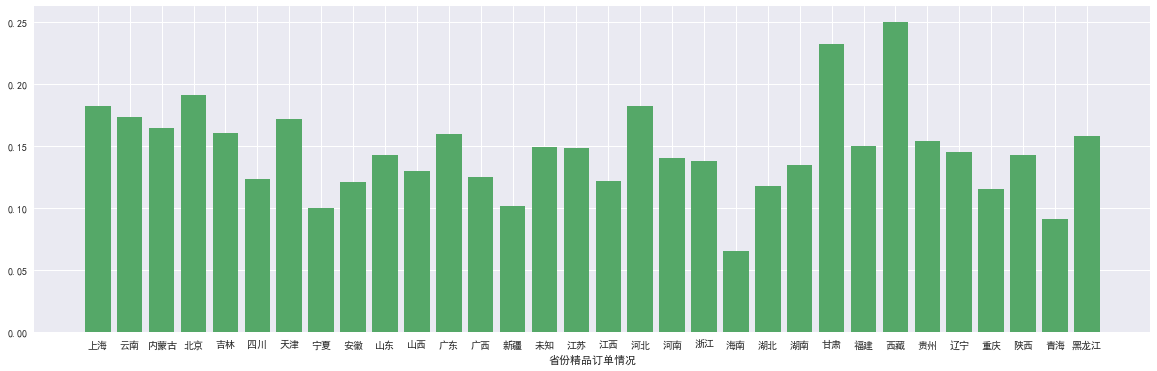

In [28]:
plt.rcParams['font.sans-serif']=['Simhei']
fig,ax = plt.subplots(1,1)
fig.set_size_inches(20,6)
p = sns.color_palette()

ax.bar(province_orderType.iloc[:,0],province_orderType.iloc[:,3],color=p[1])
ax.set_xlabel("省份精品订单情况")

## 筛选变量
筛选变量时可以应用专业知识，选取与目标字段相关性较高的字段用于建模，也可通过分析现有数据，用统计量辅助选择

为了增强模型稳定性，自变量之间最好相互独立，可运用统计方法选择要排除的变量或进行变量聚类

In [64]:
order_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20653 entries, 0 to 20652
Data columns (total 7 columns):
userid       20653 non-null int64
orderid      20653 non-null int64
orderTime    20653 non-null datetime64[ns]
orderType    20653 non-null int64
city         20653 non-null object
country      20653 non-null object
continent    20653 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.1+ MB


In [65]:
order_info.head()

,userid,orderid,orderTime,orderType,city,country,continent
0,100000000013,1000015,2016-12-14 11:21:56,0,柏林,德国,欧洲
1,100000000013,1000014,2017-08-05 19:00:43,0,旧金山,美国,北美洲
2,100000000393,1000033,2017-07-07 15:11:36,0,巴黎,法国,欧洲
3,100000000459,1000036,2016-12-01 14:14:28,0,纽约,美国,北美洲
4,100000000459,1000034,2016-11-14 18:05:23,0,巴厘岛,印度尼西亚,亚洲


In [66]:
order_info.orderType.value_counts()

0    17484
1     3169
Name: orderType, dtype: int64

In [67]:
def type_count(df,type,args):
    count = len(df[df.loc[:,args]==type])
    return count

type1_amount = order_info.groupby("userid").apply(type_count,1,args="orderType") #精品订单个数
type0_amount = order_info.groupby("userid").apply(type_count,0,args="orderType") #普通订单个数

In [68]:
type1_amount = pd.DataFrame(type1_amount)
type0_amount = pd.DataFrame(type0_amount)
type1_amount.columns = ["F2.3"]
type0_amount.columns = ["F2.0"]
# 列名

In [72]:
type1_amount["F2.3"].value_counts()

0     8892
1     1106
2      328
3      146
4       69
5       40
6       19
7        9
10       6
8        6
9        5
16       3
12       2
11       2
15       1
14       1
17       1
23       1
Name: F2.3, dtype: int64

In [73]:
type1_amount.shape

(10637, 1)

In [74]:
# 订单总数
df1 = type1_amount.merge(type0_amount,on="userid",how="left")
df1["F2.1"] = df1["F2.3"]+df1["F2.0"]
df1.head(10)

,F2.3,F2.0,F2.1
userid,,,
100000000013,0,2,2
100000000393,0,1,1
100000000459,0,2,2
100000000637,0,1,1
100000000695,0,1,1
100000000949,0,3,3
100000000975,0,1,1
100000001023,2,4,6
100000001231,0,1,1


In [75]:
# 删除无用的列
df1 = df1.drop("F2.0",1)
df1 = df1.drop("F2.3",1)
df1.head(10)

,F2.1
userid,
100000000013,2
100000000393,1
100000000459,2
100000000637,1
100000000695,1
100000000949,3
100000000975,1
100000001023,6
100000001231,1


In [79]:
order_info.orderType.value_counts()

0    17484
1     3169
Name: orderType, dtype: int64

In [81]:
[*order_info.groupby("userid")][:5]

[(100000000013,
           userid  orderid           orderTime  orderType city country continent
  0  100000000013  1000015 2016-12-14 11:21:56          0   柏林      德国        欧洲
  1  100000000013  1000014 2017-08-05 19:00:43          0  旧金山      美国       北美洲),
 (100000000393,
           userid  orderid           orderTime  orderType city country continent
  2  100000000393  1000033 2017-07-07 15:11:36          0   巴黎      法国        欧洲),
 (100000000459,
           userid  orderid           orderTime  orderType city country continent
  3  100000000459  1000036 2016-12-01 14:14:28          0   纽约      美国       北美洲
  4  100000000459  1000034 2016-11-14 18:05:23          0  巴厘岛   印度尼西亚        亚洲),
 (100000000637,
           userid  orderid           orderTime  orderType  city country  \
  5  100000000637  1000040 2017-02-10 15:14:52          0  巴塞罗那     西班牙   
  
    continent  
  5        欧洲  ),
 (100000000695,
           userid  orderid           orderTime  orderType city country continen

In [76]:
# 是否有精品订单
def type_count(df,type,args):
    count = len(df[df.loc[:,args]==type])
    return count

type1_exist = order_info.groupby("userid").apply(type_count,1,args="orderType")

In [77]:
type1_exist

userid
100000000013    0
100000000393    0
100000000459    0
100000000637    0
100000000695    0
100000000949    0
100000000975    0
100000001023    2
100000001231    0
100000001295    0
100000001505    4
100000001955    0
100000002371    0
100000003097    0
100000003461    1
100000003639    0
100000003805    0
100000004277    0
100000004297    0
100000004317    0
100000005007    1
100000006981    0
100000008119    1
100000008425    0
100000008995    0
100000009017    2
100000009463    0
100000009611    0
100000009773    1
100000009925    2
               ..
114865253440    0
114865267347    0
114865267440    0
114865267940    4
114865269647    0
114865467046    0
114865469143    0
114865567341    0
114865667341    0
114865767143    0
114865767541    0
114865967248    0
114865967640    0
114868167149    0
114868267044    0
114868367141    0
114868467944    0
114868567449    0
114868667644    0
114868867348    0
114868867947    0
114869067247    0
114869067441    0
114869067447    0
114

In [83]:
type1_exist[type1_exist>0]=1
type1_exist = pd.DataFrame(type1_exist)
type1_exist.columns = ["F2.2"]

In [84]:
type1_exist.head()

,F2.2
userid,
100000000013,0
100000000393,0
100000000459,0
100000000637,0
100000000695,0


In [85]:
type1_amount.head()

,F2.3
userid,
100000000013,0
100000000393,0
100000000459,0
100000000637,0
100000000695,0


In [86]:
feature = df1.merge(type1_exist,on="userid",how="left")
feature = feature.merge(type1_amount,on="userid",how="left")
feature.head(10)

,F2.1,F2.2,F2.3
userid,,,
100000000013,2,0,0
100000000393,1,0,0
100000000459,2,0,0
100000000637,1,0,0
100000000695,1,0,0
100000000949,3,0,0
100000000975,1,0,0
100000001023,6,1,2
100000001231,1,0,0


In [87]:
#精品订单占比
feature["F2.4"] = feature["F2.3"]/feature["F2.1"]
feature.head(10)

,F2.1,F2.2,F2.3,F2.4
userid,,,,
100000000013,2,0,0,0.000000
100000000393,1,0,0,0.000000
100000000459,2,0,0,0.000000
100000000637,1,0,0,0.000000
100000000695,1,0,0,0.000000
100000000949,3,0,0,0.000000
100000000975,1,0,0,0.000000
100000001023,6,1,2,0.333333
100000001231,1,0,0,0.000000


In [88]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10637 entries, 100000000013 to 114999280232
Data columns (total 4 columns):
F2.1    10637 non-null int64
F2.2    10637 non-null int64
F2.3    10637 non-null int64
F2.4    10637 non-null float64
dtypes: float64(1), int64(3)
memory usage: 415.5 KB


In [89]:
#订单城市最大次数
df3 = order_info.groupby(["userid","city"])["orderid"].count()

In [90]:
df3 = pd.DataFrame(df3)
df3.columns = ["Freq"]
df3.head(10)

Freq
userid       city      
100000000013 旧金山      1
             柏林       1
100000000393 巴黎       1
100000000459 巴厘岛      1
             纽约       1
100000000637 巴塞罗那     1
100000000695 东京       1
100000000949 珀斯       3
100000000975 新加坡      1
100000001023 东京       5

In [91]:
feature["F2.5"] = df3.groupby("userid")["Freq"].max()
feature.head()
#F2.5 订单城市最大次数

,F2.1,F2.2,F2.3,F2.4,F2.5
userid,,,,,
100000000013,2,0,0,0.0,1
100000000393,1,0,0,0.0,1
100000000459,2,0,0,0.0,1
100000000637,1,0,0,0.0,1
100000000695,1,0,0,0.0,1


In [92]:
feature["F2.6"] = df3.groupby("userid").count()
feature.head()
#F2.6 订单城市个数

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6
userid,,,,,,
100000000013,2,0,0,0.0,1,2
100000000393,1,0,0,0.0,1,1
100000000459,2,0,0,0.0,1,2
100000000637,1,0,0,0.0,1,1
100000000695,1,0,0,0.0,1,1


#### 其后关于国家/地区、大洲的操作方法与之相同。 

In [93]:
# 订单国家最大次数
df4 = order_info.groupby(["userid","country"])["orderid"].count()

In [94]:
df4 = pd.DataFrame(df4)
df4.columns = ["Freq"]
df4.head(10)

Freq
userid       country      
100000000013 德国          1
             美国          1
100000000393 法国          1
100000000459 印度尼西亚       1
             美国          1
100000000637 西班牙         1
100000000695 日本          1
100000000949 澳大利亚        3
100000000975 新加坡         1
100000001023 日本          5

In [95]:
feature["F2.7"] = df4.groupby("userid")["Freq"].max()
feature.head()
#F2.7 订单国家最大次数

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7
userid,,,,,,,
100000000013,2,0,0,0.0,1,2,1
100000000393,1,0,0,0.0,1,1,1
100000000459,2,0,0,0.0,1,2,1
100000000637,1,0,0,0.0,1,1,1
100000000695,1,0,0,0.0,1,1,1


In [96]:
feature["F2.8"] = df4.groupby("userid").count()
feature.head()
#F2.8 订单国家个数

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8
userid,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2
100000000393,1,0,0,0.0,1,1,1,1
100000000459,2,0,0,0.0,1,2,1,2
100000000637,1,0,0,0.0,1,1,1,1
100000000695,1,0,0,0.0,1,1,1,1


In [97]:
#订单大洲最大次数
df5 = order_info.groupby(["userid","continent"])["orderid"].count()

In [98]:
df5 = pd.DataFrame(df5)
df5.columns = ["Freq"]
df5.head()

Freq
userid       continent      
100000000013 北美洲           1
             欧洲            1
100000000393 欧洲            1
100000000459 亚洲            1
             北美洲           1

In [99]:
feature["F2.9"] = df5.groupby("userid")["Freq"].max()
#F2.9 订单大洲最大次数

In [100]:
feature["F2.10"] = df5.groupby("userid").count()
feature.head()
#F2.10 订单大洲个数

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10
userid,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2
100000000393,1,0,0,0.0,1,1,1,1,1,1
100000000459,2,0,0,0.0,1,2,1,2,1,2
100000000637,1,0,0,0.0,1,1,1,1,1,1
100000000695,1,0,0,0.0,1,1,1,1,1,1


In [103]:
order_info[order_info["orderType"]==1]
# 二者的作用是相同的

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,2017-01-03 20:19:01,1,东京,日本,亚洲
16,100000001023,1000054,2017-01-03 20:19:01,1,东京,日本,亚洲
20,100000001505,1000092,2017-05-13 19:26:25,1,巴黎,法国,欧洲
21,100000001505,1000094,2017-05-18 13:36:06,1,阿姆斯特丹,荷兰,欧洲
22,100000001505,1000095,2017-05-13 18:30:55,1,巴黎,法国,欧洲
23,100000001505,1000096,2017-05-13 20:23:12,1,布鲁塞尔,比利时,欧洲
32,100000003461,1000196,2017-04-02 10:46:55,1,曼谷,泰国,亚洲
40,100000005007,1000300,2016-12-02 14:45:04,1,首尔,韩国,亚洲
45,100000008119,1000420,2017-01-09 14:43:40,1,巴黎,法国,欧洲
50,100000009017,1000464,2017-09-03 12:44:40,1,北海道--札幌,日本,亚洲


In [101]:
#筛选出精品订单
temp1 = order_info[order_info["orderType"].isin([1])] #利用Pandas cookbook输出值为1的行

In [102]:
temp1

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,2017-01-03 20:19:01,1,东京,日本,亚洲
16,100000001023,1000054,2017-01-03 20:19:01,1,东京,日本,亚洲
20,100000001505,1000092,2017-05-13 19:26:25,1,巴黎,法国,欧洲
21,100000001505,1000094,2017-05-18 13:36:06,1,阿姆斯特丹,荷兰,欧洲
22,100000001505,1000095,2017-05-13 18:30:55,1,巴黎,法国,欧洲
23,100000001505,1000096,2017-05-13 20:23:12,1,布鲁塞尔,比利时,欧洲
32,100000003461,1000196,2017-04-02 10:46:55,1,曼谷,泰国,亚洲
40,100000005007,1000300,2016-12-02 14:45:04,1,首尔,韩国,亚洲
45,100000008119,1000420,2017-01-09 14:43:40,1,巴黎,法国,欧洲
50,100000009017,1000464,2017-09-03 12:44:40,1,北海道--札幌,日本,亚洲


In [104]:
df6 = temp1.groupby(["userid","city"])["orderid"].count()
df6 = pd.DataFrame(df6)
df6.columns = ["Freq"]
df6.head()

Freq
userid       city       
100000001023 东京        2
100000001505 巴黎        2
             布鲁塞尔      1
             阿姆斯特丹     1
100000003461 曼谷        1

In [105]:
df6.shape

(2277, 1)

In [106]:
feature["F2.11"] = df6.groupby("userid")["Freq"].max()
#F2.11精品订单城市最大次数
feature["F2.12"] = df6.groupby("userid").count()
#F2.12精品订单城市个数

In [108]:
feature.head(15)
# 没有精品订单的为nan

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12
userid,,,,,,,,,,,,
100000000013,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN
100000000393,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN
100000000459,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN
100000000637,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN
100000000695,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN
100000000949,3,0,0,0.000000,3,1,3,1,3,1,NaN,NaN
100000000975,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN
100000001023,6,1,2,0.333333,5,2,5,2,6,1,2.0,1.0
100000001231,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN


In [109]:
df7 = temp1.groupby(["userid","country"])["orderid"].count()
df7 = pd.DataFrame(df7)
df7.columns = ["Freq"]
df7.head()

Freq
userid       country      
100000001023 日本          2
100000001505 比利时         1
             法国          2
             荷兰          1
100000003461 泰国          1

In [110]:
feature["F2.13"] = df7.groupby("userid")["Freq"].max()
#F2.13精品订单国家最大次数
feature["F2.14"] = df7.groupby("userid").count()
#F2.14精品订单国家个数

In [111]:
df8 = temp1.groupby(["userid","continent"])["orderid"].count()
df8 = pd.DataFrame(df8)
df8.columns = ["Freq"]
df8.head()

,,Freq
userid,continent,
100000001023,亚洲,2
100000001505,欧洲,4
100000003461,亚洲,1
100000005007,亚洲,1
100000008119,欧洲,1


In [112]:
feature["F2.15"] = df8.groupby("userid")["Freq"].max()
#F2.15精品订单大洲最大次数
feature["F2.16"] = df8.groupby("userid").count()
#F2.16精品订单大洲个数

In [114]:
feature.head(15)

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16
userid,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
100000000393,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
100000000459,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN
100000000637,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
100000000695,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
100000000949,3,0,0,0.000000,3,1,3,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN
100000000975,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
100000001023,6,1,2,0.333333,5,2,5,2,6,1,2.0,1.0,2.0,1.0,2.0,1.0
100000001231,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# 计算时间间隔
time_gap_max = order_info.groupby("userid")["orderTime"].max()
time_gap_min = order_info.groupby("userid")["orderTime"].min()

In [116]:
time_gap_max = pd.DataFrame(time_gap_max)
time_gap_min = pd.DataFrame(time_gap_min)
time_gap = time_gap_max.merge(time_gap_min,on="userid",how="left")
time_gap.head()

,orderTime_x,orderTime_y
userid,,
100000000013,2017-08-05 19:00:43,2016-12-14 11:21:56
100000000393,2017-07-07 15:11:36,2017-07-07 15:11:36
100000000459,2016-12-01 14:14:28,2016-11-14 18:05:23
100000000637,2017-02-10 15:14:52,2017-02-10 15:14:52
100000000695,2017-06-29 15:55:34,2017-06-29 15:55:34


In [122]:
time_gap.isnull().sum()

orderTime_x    0
orderTime_y    0
dtype: int64

In [138]:
time_gap.dtypes

orderTime_x    datetime64[ns]
orderTime_y    datetime64[ns]
dtype: object

In [153]:
(time_gap["orderTime_x"]-time_gap["orderTime_y"])/feature["F2.1"]

userid
100000000013    10122563500000000
100000000393                    0
100000000459      727472500000000
100000000637                    0
100000000695                    0
100000000949      257783333333333
100000000975                    0
100000001023     1117524500000000
100000001231                    0
100000001295                    0
100000001505       87500600000000
100000001955         475000000000
100000002371     1128062750000000
100000003097                    0
100000003461                    0
100000003639     3928866000000000
100000003805                    0
100000004277                    0
100000004297                    0
100000004317                    0
100000005007     3188870000000000
100000006981     1015559666666666
100000008119     1075206500000000
100000008425     8300619000000000
100000008995                    0
100000009017     1731128333333333
100000009463                    0
100000009611      219126000000000
100000009773                    0
1000000

In [117]:
feature["F2.17"] = (time_gap["orderTime_x"]-time_gap["orderTime_y"])/feature["F2.1"]
feature.head()
#F2.17订单平均时间间隔

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17
userid,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,10122563500000000
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,727472500000000
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [137]:
feature.dtypes

F2.1               int64
F2.2               int64
F2.3               int64
F2.4             float64
F2.5               int64
F2.6               int64
F2.7               int64
F2.8               int64
F2.9               int64
F2.10              int64
F2.11            float64
F2.12            float64
F2.13            float64
F2.14            float64
F2.15            float64
F2.16            float64
F2.17             object
F2.18    timedelta64[ns]
dtype: object

In [118]:
time_gap_max_1 = temp1.groupby("userid")["orderTime"].max()
time_gap_min_1 = temp1.groupby("userid")["orderTime"].min()

In [119]:
time_gap_max_1 = pd.DataFrame(time_gap_max_1)
time_gap_min_1 = pd.DataFrame(time_gap_min_1)
time_gap_1 = time_gap_max_1.merge(time_gap_min_1,on="userid",how="left")
time_gap_1.head()

,orderTime_x,orderTime_y
userid,,
100000001023,2017-01-03 20:19:01,2017-01-03 20:19:01
100000001505,2017-05-18 13:36:06,2017-05-13 18:30:55
100000003461,2017-04-02 10:46:55,2017-04-02 10:46:55
100000005007,2016-12-02 14:45:04,2016-12-02 14:45:04
100000008119,2017-01-09 14:43:40,2017-01-09 14:43:40


In [139]:
time_gap_1.dtypes

orderTime_x    datetime64[ns]
orderTime_y    datetime64[ns]
dtype: object

In [124]:
time_gap_1.isnull().sum()

orderTime_x    0
orderTime_y    0
dtype: int64

In [125]:
feature.shape

(10637, 17)

In [126]:
feature["F2.3"].isnull().sum()

0

In [127]:
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17
userid,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,10122563500000000
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,727472500000000
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [133]:
time_gap_1.head()

,orderTime_x,orderTime_y
userid,,
100000001023,2017-01-03 20:19:01,2017-01-03 20:19:01
100000001505,2017-05-18 13:36:06,2017-05-13 18:30:55
100000003461,2017-04-02 10:46:55,2017-04-02 10:46:55
100000005007,2016-12-02 14:45:04,2016-12-02 14:45:04
100000008119,2017-01-09 14:43:40,2017-01-09 14:43:40


In [134]:
feature.loc[time_gap_1.index]

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17
userid,,,,,,,,,,,,,,,,,
100000001023,6,1,2,0.333333,5,2,5,2,6,1,2.0,1.0,2.0,1.0,2.0,1.0,1117524500000000
100000001505,5,1,4,0.800000,3,3,3,3,5,1,2.0,3.0,2.0,3.0,4.0,1.0,87500600000000
100000003461,1,1,1,1.000000,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0
100000005007,2,1,1,0.500000,1,2,1,2,2,1,1.0,1.0,1.0,1.0,1.0,1.0,3188870000000000
100000008119,2,1,1,0.500000,2,1,2,1,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1075206500000000
100000009017,3,1,2,0.666667,2,2,3,1,3,1,1.0,2.0,2.0,1.0,2.0,1.0,1731128333333333
100000009773,1,1,1,1.000000,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,0
100000009925,6,1,2,0.333333,6,1,6,1,6,1,2.0,1.0,2.0,1.0,2.0,1.0,15132666666666
100000010199,8,1,8,1.000000,4,3,6,2,8,1,4.0,3.0,6.0,2.0,8.0,1.0,2372837625000000


In [147]:
f23=pd.DataFrame(feature.loc[time_gap_1.index]["F2.3"])

In [148]:
f23['F2.3']

userid
100000001023     2
100000001505     4
100000003461     1
100000005007     1
100000008119     1
100000009017     2
100000009773     1
100000009925     2
100000010199     8
100000014029     1
100000015969     1
100000016265     4
100000017277     5
100000017465     1
100000019487     9
100000021553     1
100000022129     2
100000022335     1
100000022499     1
100000022801     4
110100016324     3
110100016726     1
110100033067     2
110100116423     1
110100273229     4
110100512625     1
110100633862     3
110100818564     2
110100818565     1
110101273620     2
                ..
114829653346     1
114829750941     1
114831269641     1
114832067442     2
114832469649     1
114834167949     1
114834867748     4
114836069144    14
114836367240     1
114836469642     5
114836669142     1
114837169648     1
114837169649     2
114837967240     1
114837967949     1
114838367748     2
114838853241     6
114839067042     1
114839067143     1
114839267144     6
114839267840     1
11483

In [157]:
(time_gap_1["orderTime_x"]-time_gap_1["orderTime_y"])/f23["F2.3"]

userid
100000001023           0 days 00:00:00
100000001505    1 days 04:46:17.750000
100000003461           0 days 00:00:00
100000005007           0 days 00:00:00
100000008119           0 days 00:00:00
100000009017   30 days 01:18:12.500000
100000009773           0 days 00:00:00
100000009925    0 days 00:41:10.500000
100000010199   27 days 11:07:17.625000
100000014029           0 days 00:00:00
100000015969           0 days 00:00:00
100000016265   45 days 14:50:23.750000
100000017277   36 days 21:12:56.800000
100000017465           0 days 00:00:00
100000019487    0 days 01:19:29.222222
100000021553           0 days 00:00:00
100000022129           0 days 00:02:49
100000022335           0 days 00:00:00
100000022499           0 days 00:00:00
100000022801           0 days 00:15:08
110100016324    0 days 00:12:45.666666
110100016726           0 days 00:00:00
110100033067    0 days 13:06:36.500000
110100116423           0 days 00:00:00
110100273229           0 days 00:22:31
110100512625      

In [159]:
(time_gap["orderTime_x"]-time_gap["orderTime_y"])/feature["F2.1"]

userid
100000000013    10122563500000000
100000000393                    0
100000000459      727472500000000
100000000637                    0
100000000695                    0
100000000949      257783333333333
100000000975                    0
100000001023     1117524500000000
100000001231                    0
100000001295                    0
100000001505       87500600000000
100000001955         475000000000
100000002371     1128062750000000
100000003097                    0
100000003461                    0
100000003639     3928866000000000
100000003805                    0
100000004277                    0
100000004297                    0
100000004317                    0
100000005007     3188870000000000
100000006981     1015559666666666
100000008119     1075206500000000
100000008425     8300619000000000
100000008995                    0
100000009017     1731128333333333
100000009463                    0
100000009611      219126000000000
100000009773                    0
1000000

In [149]:
feature["F2.18"] = (time_gap_1["orderTime_x"]-time_gap_1["orderTime_y"])/f23['F2.3']
feature.head()
#F2.18精品订单平均时间间隔

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17,F2.18
userid,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,10122563500000000,NaT
100000000393,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
100000000459,2,0,0,0.0,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,727472500000000,NaT
100000000637,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
100000000695,1,0,0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT


In [198]:
f218=(time_gap_1["orderTime_x"]-time_gap_1["orderTime_y"])/f23['F2.3']

In [199]:
f218=pd.DataFrame(f218)

In [202]:
f218

,0
userid,
100000001023,0.000000e+00
100000001505,1.035778e+05
100000003461,0.000000e+00
100000005007,0.000000e+00
100000008119,0.000000e+00
100000009017,2.596692e+06
100000009773,0.000000e+00
100000009925,2.470500e+03
100000010199,2.372838e+06


In [201]:
f218[0]=f218[0].values/np.timedelta64(1, 's')

In [190]:
# f218[0].values/np.timedelta64(1, 'ns') 将timedelta64装换成float类型

array([0.0000000e+00, 1.0357775e+14, 0.0000000e+00, ..., 6.3787750e+13,
       0.0000000e+00, 0.0000000e+00])

In [203]:
feature["F2.18"]=f218

In [204]:
feature.head(15)

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,F2.11,F2.12,F2.13,F2.14,F2.15,F2.16,F2.17,F2.18
userid,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,10122563500000000,NaN
100000000393,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
100000000459,2,0,0,0.000000,1,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,727472500000000,NaN
100000000637,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
100000000695,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
100000000949,3,0,0,0.000000,3,1,3,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,257783333333333,NaN
100000000975,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
100000001023,6,1,2,0.333333,5,2,5,2,6,1,2.0,1.0,2.0,1.0,2.0,1.0,1117524500000000,0.00
100000001231,1,0,0,0.000000,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [205]:
feature.dtypes

F2.1       int64
F2.2       int64
F2.3       int64
F2.4     float64
F2.5       int64
F2.6       int64
F2.7       int64
F2.8       int64
F2.9       int64
F2.10      int64
F2.11    float64
F2.12    float64
F2.13    float64
F2.14    float64
F2.15    float64
F2.16    float64
F2.17     object
F2.18    float64
dtype: object

In [140]:
f2=pd.read_csv('../data/workeddata/F2.csv')

In [141]:
f2.head()

,userid,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,...,F2.27,F2.28,F2.29,F2.30,F2.31,F2.32,F2.33,F2.34,F2.35,F2.36
0,100000000013,2,0,0,0.0,1,2,1,2,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100000000393,1,0,0,0.0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100000000459,2,0,0,0.0,1,2,1,2,1,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100000000637,1,0,0,0.0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100000000695,1,0,0,0.0,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
f2.dtypes

userid      int64
F2.1        int64
F2.2        int64
F2.3        int64
F2.4      float64
F2.5        int64
F2.6        int64
F2.7        int64
F2.8        int64
F2.9        int64
F2.10       int64
F2.11     float64
F2.12     float64
F2.13     float64
F2.14     float64
F2.15     float64
F2.16     float64
F2.17     float64
F2.18     float64
F2.19     float64
F2.20     float64
F2.21     float64
F2.22     float64
F2.23     float64
F2.24     float64
F2.25     float64
F2.26     float64
F2.27     float64
F2.28     float64
F2.29     float64
F2.30     float64
F2.31     float64
F2.32     float64
F2.33     float64
F2.34     float64
F2.35     float64
F2.36     float64
dtype: object

In [196]:
f2['F2.18']

0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
5              0.00
6              0.00
7              0.00
8              0.00
9              0.00
10        103577.75
11             0.00
12             0.00
13             0.00
14             0.00
15             0.00
16             0.00
17             0.00
18             0.00
19             0.00
20             0.00
21             0.00
22             0.00
23             0.00
24             0.00
25       2596692.50
26             0.00
27             0.00
28             0.00
29          2470.50
            ...    
10607          0.00
10608          0.00
10609          0.00
10610      63787.75
10611          0.00
10612          0.00
10613          0.00
10614          0.00
10615          0.00
10616          0.00
10617          0.00
10618          0.00
10619          0.00
10620          0.00
10621          0.00
10622          0.00
10623          0.00
10624          0.00
10625          0.00


In [225]:
order_info["city"].value_counts()

新加坡        1937
东京         1889
纽约         1127
台北         1107
吉隆坡        1076
悉尼         1035
香港         1033
大阪         1016
墨尔本         821
曼谷          819
巴黎          680
伦敦          672
洛杉矶         618
巴厘岛         453
普吉岛         365
首尔          340
旧金山         293
清迈          259
京都          216
布里斯班        209
北海道--札幌     197
波士顿         189
温哥华         188
黄金海岸        174
罗马          155
沙巴--亚庇      153
奥克兰         150
华盛顿         143
米兰          135
巴塞罗那        130
           ... 
蒂卡波湖          1
云顶高原          1
上海            1
多哈            1
贝尔法斯特         1
汉密尔顿          1
摩纳哥           1
大叻            1
圣保罗           1
温莎            1
熊本市           1
戛纳            1
毛里求斯          1
墨西哥城          1
谢菲尔德          1
大西洋城          1
卡萨布兰卡         1
哈尔施塔特         1
岐阜县           1
卢塞恩           1
雅加达           1
拉科鲁尼亚         1
马拉加           1
千叶市           1
格拉纳达          1
约翰内斯堡         1
利瓦绿洲          1
考文垂           1
雷克雅未克         1
台南            1
Name: city, Length: 205,

In [206]:
order_info["city"].value_counts().head(10)

新加坡    1937
东京     1889
纽约     1127
台北     1107
吉隆坡    1076
悉尼     1035
香港     1033
大阪     1016
墨尔本     821
曼谷      819
Name: city, dtype: int64

In [207]:
temp2 = order_info[order_info["city"].isin(["新加坡","东京","纽约","台北","吉隆坡","悉尼","香港","大阪","墨尔本","曼谷"])]

In [208]:
temp2.head()

,userid,orderid,orderTime,orderType,city,country,continent
3,100000000459,1000036,2016-12-01 14:14:28,0,纽约,美国,北美洲
6,100000000695,1000042,2017-06-29 15:55:34,0,东京,日本,亚洲
10,100000000975,1000052,2017-06-12 10:14:58,0,新加坡,新加坡,亚洲
11,100000001023,1000068,2017-03-22 10:51:28,0,东京,日本,亚洲
12,100000001023,1000066,2017-01-03 20:19:01,0,东京,日本,亚洲


In [209]:
df9 = temp2.groupby(["userid","city"])["orderid"].count()
df9 = pd.DataFrame(df9)
df9.columns = ["Freq"]
df9.head()

,,Freq
userid,city,
100000000459,纽约,1
100000000695,东京,1
100000000975,新加坡,1
100000001023,东京,5
100000001295,纽约,1


In [210]:
feature["F2.19"] = df9.groupby("userid").sum() #订单热门城市访问次数

In [211]:
df9[df9["Freq"]>0]=1
feature["F2.20"] = df9.groupby("userid").max() #订单热门城市是否访问
feature["F2.21"] = df9.groupby("userid").count() #订单热门城市的数量

In [212]:
order_info["country"].value_counts().head(10)

日本      3509
美国      3029
澳大利亚    2425
新加坡     1937
泰国      1556
马来西亚    1431
中国台湾    1348
中国香港    1033
法国       754
英国       726
Name: country, dtype: int64

In [213]:
temp3 = order_info[order_info["country"].isin(["日本","美国","澳大利亚","新加坡","泰国","马来西亚","中国台湾","中国香港","法国","英国"])]

In [232]:
order_info.shape

(20653, 7)

In [231]:
temp3.shape

(17748, 7)

In [236]:
df10 = temp3.groupby(["userid","country"])["orderid"].count()
df10 = pd.DataFrame(df10)
df10.columns = ["Freq"]
df10.head()

,,Freq
userid,country,
100000000013,美国,1
100000000393,法国,1
100000000459,美国,1
100000000695,日本,1
100000000949,澳大利亚,3


In [215]:
feature["F2.22"] = df10.groupby("userid").sum() #订单热门国家访问次数

In [244]:
feature.head(9)

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.15,F2.16,F2.17,F2.18,F2.19,F2.20,F2.21,F2.22,F2.23,F2.24
userid,,,,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.000000,1,2,1,2,1,2,...,NaN,NaN,10122563500000000,NaN,NaN,NaN,NaN,1.0,1.0,1.0
100000000393,1,0,0,0.000000,1,1,1,1,1,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,1.0
100000000459,2,0,0,0.000000,1,2,1,2,1,2,...,NaN,NaN,727472500000000,NaN,1.0,1.0,1.0,1.0,1.0,1.0
100000000637,1,0,0,0.000000,1,1,1,1,1,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100000000695,1,0,0,0.000000,1,1,1,1,1,1,...,NaN,NaN,0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
100000000949,3,0,0,0.000000,3,1,3,1,3,1,...,NaN,NaN,257783333333333,NaN,NaN,NaN,NaN,3.0,1.0,1.0
100000000975,1,0,0,0.000000,1,1,1,1,1,1,...,NaN,NaN,0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
100000001023,6,1,2,0.333333,5,2,5,2,6,1,...,2.0,1.0,1117524500000000,0.0,5.0,1.0,1.0,6.0,1.0,2.0
100000001231,1,0,0,0.000000,1,1,1,1,1,1,...,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,1.0


In [241]:
# [*df10.groupby("userid")][:5]
# 未进行 df10[df10["Freq"]>0]=1

[(100000000013,                       Freq
  userid       country      
  100000000013 美国          1), (100000000393,                       Freq
  userid       country      
  100000000393 法国          1), (100000000459,                       Freq
  userid       country      
  100000000459 美国          1), (100000000695,                       Freq
  userid       country      
  100000000695 日本          1), (100000000949,                       Freq
  userid       country      
  100000000949 澳大利亚        3)]

In [243]:
df10[df10["Freq"]>0]=1
feature["F2.23"] = df10.groupby("userid").max() #订单热门国家是否访问
feature["F2.24"] = df10.groupby("userid").count() #订单热门国家的数量

In [238]:
feature["F2.24"].value_counts()

1.0    8712
2.0     615
3.0      70
4.0      13
5.0       3
Name: F2.24, dtype: int64

In [239]:
df10.head()

,,Freq
userid,country,
100000000013,美国,1
100000000393,法国,1
100000000459,美国,1
100000000695,日本,1
100000000949,澳大利亚,3


In [229]:
df10.shape

(10219, 1)

In [230]:
feature.shape

(10637, 24)

In [228]:
df10.Freq.unique()
# df10本来就是把去过10个热门国家的数据取出来的，所以df10["Freq"]>0是恒成立的

array([1], dtype=int64)

In [222]:
order_info["continent"].value_counts().head(2)

亚洲     12054
北美洲     3432
Name: continent, dtype: int64

In [224]:
order_info["continent"].value_counts()

亚洲     12054
北美洲     3432
大洋洲     2628
欧洲      2527
非洲        11
南美洲        1
Name: continent, dtype: int64

In [223]:
temp4 = order_info[order_info["continent"].isin(["亚洲","北美洲"])]

In [245]:
df11 = temp4.groupby(["userid","continent"])["orderid"].count()
df11 = pd.DataFrame(df11)
df11.columns = ["Freq"]
df11.head()

Freq
userid       continent      
100000000013 北美洲           1
100000000459 亚洲            1
             北美洲           1
100000000695 亚洲            1
100000000975 亚洲            1

In [246]:
feature["F2.25"] = df11.groupby("userid").sum() #订单热门大洲访问次数

In [247]:
df11[df11["Freq"]>0]=1
feature["F2.26"] = df11.groupby("userid").max() #订单热门大洲是否访问
feature["F2.27"] = df11.groupby("userid").count() #订单热门大洲的数量

In [248]:
temp1.head()

,userid,orderid,orderTime,orderType,city,country,continent
13,100000001023,1000070,2017-01-03 20:19:01,1,东京,日本,亚洲
16,100000001023,1000054,2017-01-03 20:19:01,1,东京,日本,亚洲
20,100000001505,1000092,2017-05-13 19:26:25,1,巴黎,法国,欧洲
21,100000001505,1000094,2017-05-18 13:36:06,1,阿姆斯特丹,荷兰,欧洲
22,100000001505,1000095,2017-05-13 18:30:55,1,巴黎,法国,欧洲


In [249]:
temp1["city"].value_counts().head(10)

东京     339
大阪     217
台北     135
京都     129
曼谷     128
巴厘岛    127
墨尔本    119
巴黎     110
吉隆坡    106
伦敦     105
Name: city, dtype: int64

In [250]:
temp2_1 = temp1[temp1["city"].isin(["东京","大阪","台北","京都","曼谷","巴厘岛","墨尔本","巴黎","吉隆坡","伦敦"])]

In [251]:
df9_1 = temp2_1.groupby(["userid","city"])["orderid"].count()
df9_1 = pd.DataFrame(df9_1)
df9_1.columns = ["Freq"]
df9_1.head()

,,Freq
userid,city,
100000001023,东京,2
100000001505,巴黎,2
100000003461,曼谷,1
100000008119,巴黎,1
100000009925,墨尔本,2


In [252]:
feature["F2.28"] = df9_1.groupby("userid").sum() #精品订单热门城市访问次数

In [253]:
df9_1[df9_1["Freq"]>0]=1
feature["F2.29"] = df9_1.groupby("userid").max() #精品订单热门城市是否访问
feature["F2.30"] = df9_1.groupby("userid").count() #精品订单热门城市的数量

In [254]:
temp1["country"].value_counts().head(10)

日本       842
美国       393
中国台湾     274
澳大利亚     269
泰国       169
法国       135
印度尼西亚    127
马来西亚     125
英国       125
韩国       100
Name: country, dtype: int64

In [255]:
temp3_1 = temp1[temp1["country"].isin(["日本","美国","中国台湾","澳大利亚","泰国","法国","印度尼西亚","英国","马来西亚","韩国"])]

In [256]:
df10_1 = temp3_1.groupby(["userid","country"])["orderid"].count()
df10_1 = pd.DataFrame(df10_1)
df10_1.columns = ["Freq"]
df10_1.head()

,,Freq
userid,country,
100000001023,日本,2
100000001505,法国,2
100000003461,泰国,1
100000005007,韩国,1
100000008119,法国,1


In [257]:
feature["F2.31"] = df10_1.groupby("userid").sum() #精品订单热门国家访问次数

In [258]:
df10_1[df10_1["Freq"]>0]=1
feature["F2.32"] = df10_1.groupby("userid").max() #精品订单热门国家是否访问
feature["F2.33"] = df10_1.groupby("userid").count() #精品订单热门国家的数量

In [259]:
temp1["continent"].value_counts().head(2)

亚洲    1794
欧洲     619
Name: continent, dtype: int64

In [260]:
temp4_1 = temp1[temp1["continent"].isin(["亚洲","欧洲"])]

In [261]:
df11_1 = temp4_1.groupby(["userid","continent"])["orderid"].count()
df11_1 = pd.DataFrame(df11_1)
df11_1.columns = ["Freq"]
df11_1.head()

,,Freq
userid,continent,
100000001023,亚洲,2
100000001505,欧洲,4
100000003461,亚洲,1
100000005007,亚洲,1
100000008119,欧洲,1


In [262]:
feature["F2.34"] = df11_1.groupby("userid").sum() #订单热门大洲访问次数

In [263]:
df11_1[df11_1["Freq"]>0]=1
feature["F2.35"] = df11_1.groupby("userid").max() #订单热门大洲是否访问
feature["F2.36"] = df11_1.groupby("userid").count() #订单热门大洲的数量

In [266]:
feature.head()

,F2.1,F2.2,F2.3,F2.4,F2.5,F2.6,F2.7,F2.8,F2.9,F2.10,...,F2.27,F2.28,F2.29,F2.30,F2.31,F2.32,F2.33,F2.34,F2.35,F2.36
userid,,,,,,,,,,,,,,,,,,,,,
100000000013,2,0,0,0.0,1,2,1,2,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000393,1,0,0,0.0,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000459,2,0,0,0.0,1,2,1,2,1,2,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000637,1,0,0,0.0,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000695,1,0,0,0.0,1,1,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
feature = feature.fillna(0) #空值填补0

In [267]:
feature.to_csv("../data/workeddata/F2-ys-0722.csv",
                    encoding="gb2312",index=True)